In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("walmart_data.csv")
df.head(5)

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
df.shape

(550068, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Unnamed: 0                  550068 non-null  int64 
 1   User_ID                     550068 non-null  int64 
 2   Product_ID                  550068 non-null  object
 3   Gender                      550068 non-null  object
 4   Age                         550068 non-null  object
 5   Occupation                  550068 non-null  int64 
 6   City_Category               550068 non-null  object
 7   Stay_In_Current_City_Years  550068 non-null  object
 8   Marital_Status              550068 non-null  int64 
 9   Product_Category            550068 non-null  int64 
 10  Purchase                    550068 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 46.2+ MB


In [5]:
df.isna().sum()

Unnamed: 0                    0
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,550068.000000,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,275033.500000,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,158791.098274,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,0.000000,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,137516.750000,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,275033.500000,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,412550.250000,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,550067.000000,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)
print(df.columns)

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')


In [8]:
print(len(df.columns))

10


#### Exploring the purchase column -
    1. Basic descriptive stats
    2. Visulization
    3. Outlier detection
    4. Normality Test


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest


def basic_description(df, column_name):
    stats = df[column_name].describe()
    skewness = df[column_name].skew()
    kurtosis = df[column_name].kurt()
    print(f"Descriptive Stats for {column_name}: \n{stats}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")




def create_graphs(df, column_name):
    plt.figure(figsize=(14,6))

    #Histogram
    plt.subplot(1,3,1)
    sns.histplot(data=df, x = column_name, kde=True)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel("frequency")
    


    #Boxplot
    plt.subplot(1,3,2)
    sns.boxplot(y= df[column_name], color='orange') 
    plt.title(f"Boxplot of {column_name}")
    plt.ylabel(column_name)
    
    
    #Violin plot
    plt.subplot(1,3,3)
    sns.violinplot(y= df[column_name], color='green') 
    plt.title(f"Violinplot of {column_name}")
    plt.ylabel(column_name)

    plt.tight_layout()
    plt.show()

def outlier_detection(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    IQR = Q3-Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    outliers = df[(df[column_name]<lower_bound) |(df[column_name]>upper_bound)]

    print(f"Outliers detected in {column_name}")
    print(outliers)
    return outliers




def check_normality(df, column_name):
    stats, p = shapiro(df[column_name])
    print(f"Shapiro-Wilk Test for {column_name}: Stat = {stats}, p = {p}")

    if p > 0.05:
        print("The data appears to be normally distributed.")
    else:
        print("The data does not appear to be normally distributed.")

    print("!"*50)
    
    stat, p = normaltest(df[column_name])

    print(f"D’Agostino’s K^2 Test: Stat={stat}, p={p}")
    if p > 0.05:
        print("The data appears to be normally distributed.")
    else:
        print("The data does not appear to be normally distributed.")


Descriptive Stats for Purchase: 
count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64
Skewness: 0.6001400037087128
Kurtosis: -0.3383775655851702
******************************************************************************************


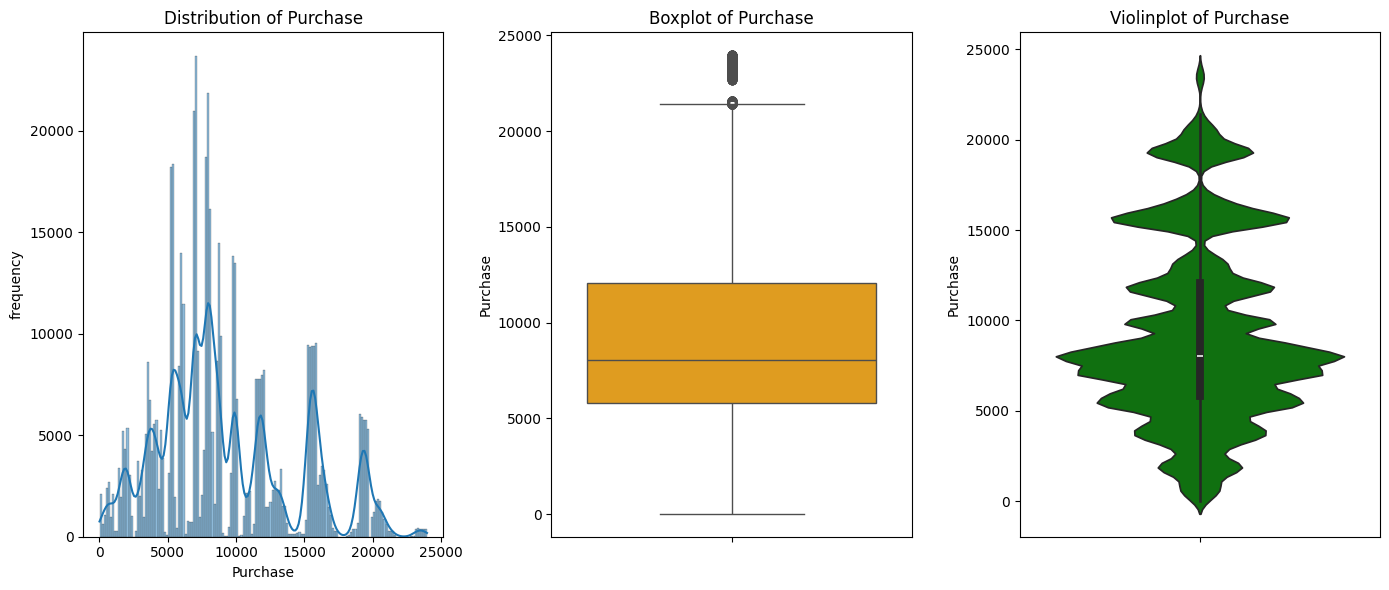

In [11]:
basic_description(df, 'Purchase')
print("*"*90)
create_graphs(df, 'Purchase')


In [ ]:
print("*"*90)
outlier_detection(df, 'Purchase')
print("*"*90)
check_normality(df, 'Purchase')

******************************************************************************************
Outliers detected in Purchase
        User_ID Product_ID Gender    Age  Occupation City_Category  \
343     1000058  P00117642      M  26-35           2             B   
375     1000062  P00119342      F  36-45           3             A   
652     1000126  P00087042      M  18-25           9             B   
736     1000139  P00159542      F  26-35          20             C   
1041    1000175  P00052842      F  26-35           2             B   
...         ...        ...    ...    ...         ...           ...   
544488  1005815  P00116142      M  26-35          20             B   
544704  1005847  P00085342      F  18-25           4             B   
544743  1005852  P00202242      F  26-35           1             A   
545663  1006002  P00116142      M  51-55           0             C   
545787  1006018  P00052842      M  36-45           1             C   

       Stay_In_Current_City_Years  Mar

C:\Users\singh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 550068.
  res = hypotest_fun_out(*samples, **kwds)


## Observations
    1.The median purchase value is approximately 10,000, indicating the central tendency.
    2.The interquartile range (IQR) spans from 5,000 (Q1) to 15,000 (Q3).
    3.Outliers exist above 20,000, indicating rare high purchase values.
    4.The minimum purchase is near 0, with a lower whisker extending to this value.
    5.The upper whisker ends at approximately 20,000, with no extreme values below the lower whisker.
    6.The density in the violin plot shows a peak around 10,000, indicating the most frequent purchases.
    7.The distribution appears slightly multi-modal, with multiple peaks visible in the violin plot.
    8.Purchases are moderately symmetrical, with minor variations in higher values.
    9.The majority of purchase values lie within a stable range of 5,000 to 15,000.
    10.The presence of outliers suggests occasional high-value purchases, impacting the data spread.
    11.Both tests strongly suggest non-normality in the Purchase data.
    12.The presence of outliers (observed in boxplots) and the multi-modal peaks (from the violin plot) are consistent with the non-normal distribution

In [13]:
print(df.columns)

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')


In [32]:
def create_barplot(df:pd.DataFrame, x_label: str, y_label: str ,title_label:str,estimator:str = 'mean'  ,hue_label:str = None, labels_hue:list= None):

    sns.set_style("whitegrid")
    plt.figure(figsize=(10,10))

    if  hue_label is None:
        sns.barplot(data =df, y = y_label, x= x_label, order=order, estimator=estimator)
    else:
        sns.barplot(data =df, y = y_label, x= x_label, hue = hue_label, errorbar = None, estimator=estimator)

    plt.title(title_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    
    plt.legend(
            title=f"{hue_label}",
            loc="upper left",
            bbox_to_anchor=(1.05, 1),
            labels=labels_hue
        )
    plt.show()

def create_scatterplot(df:pd.DataFrame, x_label: str, y_label: str, title_label: str, hue_label: str = None, labels_hue: list = None) -> None:
        
        sns.set_style("whitegrid")
        plt.figure(figsize=(10, 10))

        if  hue_label is None:
            sns.scatterplot(data =df, y = y_label, x= x_label)
        else:
            sns.scatterplot(data =df, y = y_label, x= x_label, hue = hue_label)

        plt.title(title_label)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        
        plt.legend(
            title=f"{hue_label}",
            loc="upper left",
            bbox_to_anchor=(1.05, 1),
            labels=labels_hue
        )

        plt.show()




****************************************************************************************************


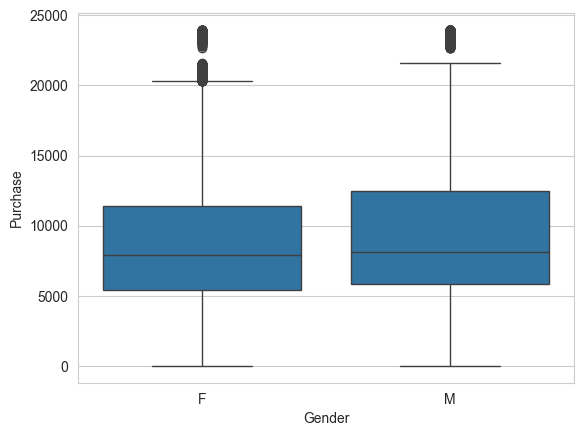

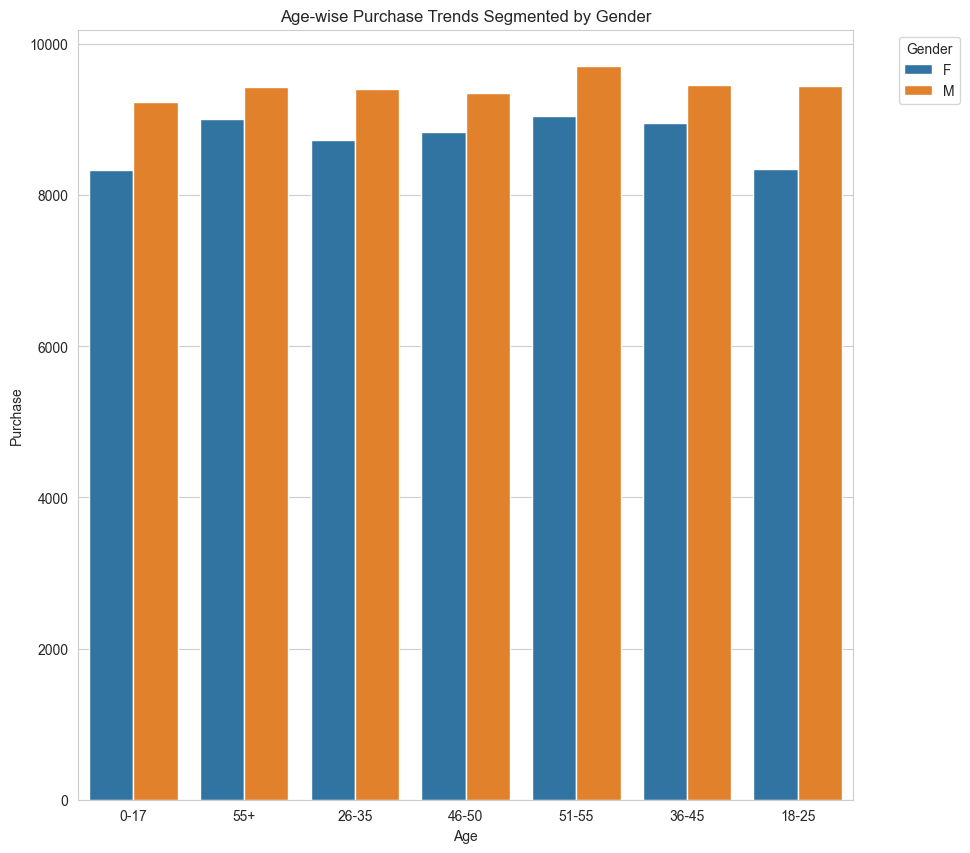

****************************************************************************************************


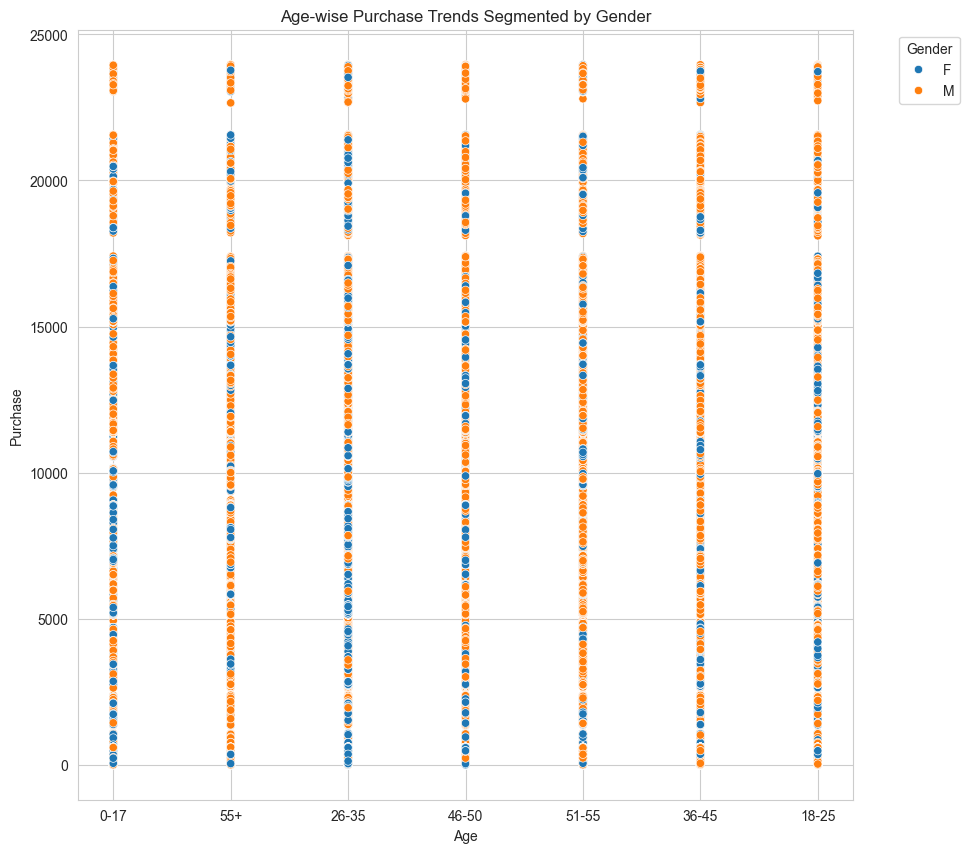

In [39]:
sns.boxplot(x=df['Gender'], y=df['Purchase'])
print("*"*100)
create_barplot(df =df, x_label='Age', y_label='Purchase', title_label="Age-wise Purchase Trends Segmented by Gender", estimator= "mean",hue_label="Gender")
print("*"*100)
create_scatterplot(df =df, x_label='Age', y_label='Purchase', title_label="Age-wise Purchase Trends Segmented by Gender", hue_label="Gender")


<Axes: xlabel='Gender', ylabel='Purchase'>

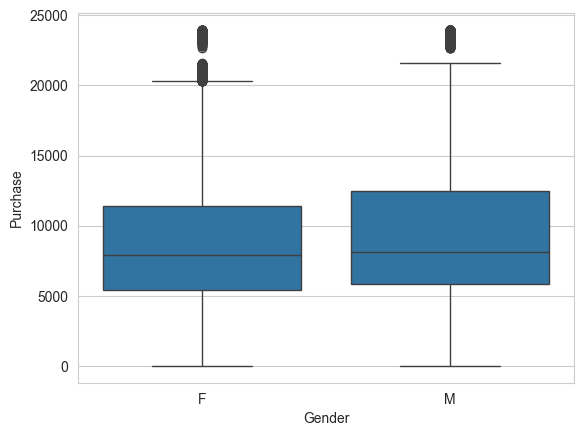

For Females (F):

    1.The lowest average purchase values are seen in the 0-17 and 18-25 age groups, suggesting younger female customers tend to spend less, likely due to lower disposable income
    2.There's a notable jump in purchasing power for females in the 55+ category, indicating higher spending capacity among senior female customers
    3.Female purchases show less variance (more clustered dots) in the middle age ranges (36-45, 46-50), suggesting more consistent spending patterns
    4.The 51-55 age group shows the highest average purchase values among females, potentially indicating peak career earnings and spending power
    5.There are fewer extreme outliers in female purchase patterns across all age groups, suggesting more moderate and predictable spending behavior


For Males (M):

    1.Male purchases consistently show higher average values across all age groups compared to females, indicating generally higher spending patterns
    2.The 51-55 age group shows the highest peak in male purchases, mirroring the female trend but at a higher value
    3.Male purchase patterns show more scattered data points (greater variance) in the scatter plot, suggesting more irregular spending habits
    4.Even in younger age groups (18-25), male purchases show higher minimum values compared to females
    5.There are more high-value outliers in male purchase patterns, particularly in the middle age ranges (36-45, 46-50), indicating more instances of large individual purchases
 